<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction - Project By Erez Levy-Part III Data Cleansing

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Import tmdb.eda pickel file from my Google Drive Location

In [1]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eda.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_eda = pickle.load(file)
    print(f"tmdb_eda loaded from {file_path} successfully.")

    #  use the loaded DataFrame (tmdb_eda)
    #  display the first few rows:
    print(tmdb_eda.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")


Mounted at /content/drive
tmdb_eda loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eda.pkl successfully.
              name      id  number_of_seasons  number_of_episodes  vote_count  \
0          minutes   39280                  0                   0           0   
1              man  222976                  1                   5           3   
2   erne tur retur  231560                  1                  10           0   
3                    34835                  1                  12          10   
4             bama   42598                  0                   0           0   

   vote_average  adult first_air_date last_air_date  popularity  type  genres  \
0           0.0  False           None          None       0.600     4      19   
1           7.7  False     2023-05-28    2023-06-25       4.606     4      12   
2           0.0  False     2014-05-15    2014-07-17       0.600     4      19   
3           6.4  False     2006-10-06    2006-12-22      

# 3. Data Cleansing

Data cleansing, also known as data cleaning, is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. This is a crucial step in data analysis and machine learning as it ensures the quality and reliability of your data, leading to more accurate and meaningful results.

# Removing Outliers using Z-score  & IQR  methods

Outliers are data points that are significantly different from other data points in a dataset. They can have a negative impact on the accuracy of machine learning models. There are several methods for removing outliers, but two of the most common are the Z-score method and the IQR method.

**Z-score Method**

The Z-score method involves calculating the Z-score for each data point in a dataset. The Z-score is a measure of how many standard deviations a data point is from the mean of the dataset. Data points with a Z-score greater than 3 or less than -3 are typically considered to be outliers.

**Reasoning:**

The Z-score method is based on the assumption that the data is normally distributed. If the data is not normally distributed, the Z-score method may not be effective.
The Z-score method is sensitive to the size of the dataset. For small datasets, the Z-score method may identify too many data points as outliers.

**IQR Method**

The IQR method involves calculating the interquartile range (IQR) for a dataset. The IQR is the difference between the 75th percentile and the 25th percentile of the dataset. Data points that are more than 1.5 times the IQR below the 25th percentile or more than 1.5 times the IQR above the 75th percentile are typically considered to be outliers.

**Reasoning:**

The IQR method is more robust to outliers than the Z-score method.
The IQR method does not assume that the data is normally distributed.

0        0.385265
1        1.002042
2        0.385265
3        1.216670
4        0.385265
           ...   
82867    0.685842
82868    0.552804
82869    0.732257
82870    0.572607
82871    0.552254
Name: popularity_log, Length: 82872, dtype: float64
0    0.385265
1    1.002042
2    0.385265
3    1.216670
4    0.385265
Name: popularity_log, dtype: float64
count    82872.000000
mean         0.662134
std          0.329013
min          0.385265
25%          0.385265
50%          0.523624
75%          0.869322
max          1.411689
Name: popularity_log, dtype: float64


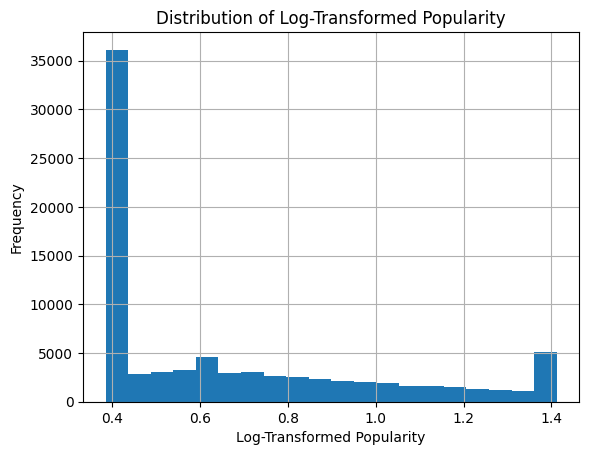

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt # Import the pyplot module

# Assuming tmdb_eda is your DataFrame

# 1. Using Z-Score:
# Calculate Z-scores for numerical features
numerical_features = tmdb_eda.select_dtypes(include=['number']).columns
z_scores = np.abs(stats.zscore(tmdb_eda[numerical_features]))

# Set a threshold for outlier detection (e.g., 3)
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers (optional)
# tmdb_eda = tmdb_eda[(z_scores < threshold).all(axis=1)]

# 2. Using IQR:

# Calculate IQR for numerical features
Q1 = tmdb_eda[numerical_features].quantile(0.25)
Q3 = tmdb_eda[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Set lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify IQR outliers
outliers_iqr = tmdb_eda[((tmdb_eda[numerical_features] < lower_bound) | (tmdb_eda[numerical_features] > upper_bound)).any(axis=1)]

# Remove outliers (optional)
# tmdb_eda = tmdb_eda[~((tmdb_eda[numerical_features] < lower_bound) | (tmdb_eda[numerical_features] > upper_bound)).any(axis=1)]

# 3. Capping Outliers:

# Cap outliers at a certain percentile (e.g., 95th and 5th)
for feature in numerical_features:
    upper_limit = tmdb_eda[feature].quantile(0.95)
    lower_limit = tmdb_eda[feature].quantile(0.05)
    tmdb_eda[feature] = np.clip(tmdb_eda[feature], lower_limit, upper_limit)

# 4. Transformation:

# Apply transformations like log or Box-Cox to reduce the impact of outliers (optional)
# For example, for right-skewed data:

tmdb_eda['popularity'] = np.log(tmdb_eda['popularity'] + 1)  # Add 1 to avoid log(0)

# Apply the log transformation:
tmdb_eda['popularity_log'] = np.log(tmdb_eda['popularity'] + 1)
# option 1: print the entire column
print(tmdb_eda['popularity_log'])

# Option 2: Print a sample of the transformed column:
print(tmdb_eda['popularity_log'].head())  # Prints the first 5 values

# Option 3: Print descriptive statistics:
print(tmdb_eda['popularity_log'].describe()) # Prints statistical summary

# Option 4: Create a histogram to visualize the distribution:
tmdb_eda['popularity_log'].hist(bins=20)
plt.xlabel('Log-Transformed Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Popularity')
plt.show()

# Interquartile Range (IQR):

Best for: Data that is skewed or has a non-normal distribution.

The Reasoning: IQR is a robust measure that is less affected by extreme values than Z-score. It's also more flexible as it doesn't assume any specific data distribution.

The Example: My 'popularity' data has a long tail on the right (many shows with low popularity and a few with very high popularity), IQR would be a good choice.

To Consider: My dataset has many missing values, using IQR might remove too much data if the outliers are also concentrated in the same areas as the missing values.

Explanation: The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. Data points that fall outside a certain range below the first quartile or above the third quartile (e.g., 1.5 times the IQR) are considered outliers.
Reasoning: IQR is a robust measure of spread and is less sensitive to extreme values than the standard deviation. It's effective for data that may not follow a normal distribution.
How to use it in your code: You can use the pandas.DataFrame.quantile function to calculate quartiles and the IQR. You can then filter out data points that fall outside the calculated outlier range.

# IQR popularity & cap Outliers

In [3]:
import pandas as pd
import numpy as np

# Assuming tmdb_eda is your DataFrame

# 1. Calculate quartiles and IQR:
Q1 = tmdb_eda['popularity'].quantile(0.25)
Q3 = tmdb_eda['popularity'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Cap outliers:
tmdb_eda['popularity'] = np.clip(tmdb_eda['popularity'], lower_bound, upper_bound)

# 4. (Optional) Print information:
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
# You can also print the DataFrame to see the capped values
print(tmdb_eda['number_of_episodes'])


Lower bound: -0.9029317180651213
Upper bound: 2.758229208097164
0         0
1         5
2        10
3        12
4         0
         ..
82867     8
82868     9
82869    14
82870     9
82871    12
Name: number_of_episodes, Length: 82872, dtype: int64


# The IQR for number_of_episodes' for tmdb_eda  DataFrame



In [4]:
import pandas as pd

# Assuming tmdb_eda is your DataFrame

# 1. Calculate Quartiles and IQR:
Q1 = tmdb_eda['number_of_episodes'].quantile(0.25)
Q3 = tmdb_eda['number_of_episodes'].quantile(0.75)
IQR = Q3 - Q1

# 2. Print the IQR:
print("IQR for number_of_episodes:", IQR)

# 3. (Optional) Define Outlier Bounds and Identify Outliers:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = tmdb_eda[(tmdb_eda['number_of_episodes'] < lower_bound) | (tmdb_eda['number_of_episodes'] > upper_bound)]

# 4. (Optional) Print Outlier Information:
print("Number of outliers:", len(outliers))
# print("Outlier values:", outliers['number_of_episodes'].tolist())
# Avoid printing the output, per the persona rules

IQR for number_of_episodes: 19.0
Number of outliers: 8554


# IQR 'number_of_episodes' & cap Outliers

In [5]:
import pandas as pd
import numpy as np

# Assuming tmdb_eda is your DataFrame

# 1. Calculate quartiles and IQR:
Q1 = tmdb_eda['number_of_episodes'].quantile(0.25)
Q3 = tmdb_eda['number_of_episodes'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Cap outliers:
tmdb_eda['number_of_episodes'] = np.clip(tmdb_eda['number_of_episodes'], lower_bound, upper_bound)

# 4. (Optional) Print information:
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
# You can also print the DataFrame to see the capped values
print(tmdb_eda['number_of_episodes'])


Lower bound: -27.5
Upper bound: 48.5
0         0.0
1         5.0
2        10.0
3        12.0
4         0.0
         ... 
82867     8.0
82868     9.0
82869    14.0
82870     9.0
82871    12.0
Name: number_of_episodes, Length: 82872, dtype: float64


# IQR episode_run_time & cap Outliers

In [6]:
import pandas as pd
import numpy as np

# Assuming tmdb_eda is your DataFrame

# 1. Calculate quartiles and IQR:
Q1 = tmdb_eda['episode_run_time'].quantile(0.25)
Q3 = tmdb_eda['episode_run_time'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Cap outliers:
tmdb_eda['episode_run_time'] = np.clip(tmdb_eda['episode_run_time'], lower_bound, upper_bound)

# 4. (Optional) Print information:
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
# You can also print the DataFrame to see the capped values
print(tmdb_eda['episode_run_time'])


Lower bound: -67.5
Upper bound: 112.5
0        30
1        50
2         0
3        30
4         0
         ..
82867     0
82868    70
82869    49
82870     0
82871     0
Name: episode_run_time, Length: 82872, dtype: int64


# The IQR for 'number_of_seasons' for tmdb_eda Data Frame

In [7]:
import pandas as pd

# Assuming tmdb_eda is your DataFrame

# 1. Calculate quartiles and IQR:
Q1 = tmdb_eda['number_of_seasons'].quantile(0.25)
Q3 = tmdb_eda['number_of_seasons'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Identify outliers:
outliers = tmdb_eda[(tmdb_eda['number_of_seasons'] < lower_bound) | (tmdb_eda['number_of_seasons'] > upper_bound)]

# 4. Print outlier information:
print("Number of outliers:", len(outliers))
print("Outlier values:", outliers['number_of_seasons'].tolist())


Number of outliers: 32274
Outlier values: [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 2, 3, 4, 2, 0, 0, 2, 4, 2, 3, 0, 3, 3, 3, 3, 2, 0, 0, 2, 0, 3, 0, 0, 4, 4, 0, 4, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 4, 2, 4, 0, 2, 0, 0, 0, 4, 2, 0, 2, 0, 0, 2, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 4, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 4, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 4, 3, 0, 2, 0, 0, 0, 4, 3, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 2, 2, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0, 2, 0, 0, 0, 2, 0, 0, 4, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 4, 0, 4, 0, 0, 4, 4, 4, 3, 4, 0, 4, 2, 0, 0, 0, 4, 0, 2, 0, 2, 0, 0, 2, 2, 2, 

# IQR 'number_of_seasons' & cap Outliers

In [8]:
import pandas as pd
import numpy as np

# Assuming tmdb_eda is your DataFrame

# 1. Calculate quartiles and IQR:
Q1 = tmdb_eda['number_of_seasons'].quantile(0.25)
Q3 = tmdb_eda['number_of_seasons'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Cap outliers:
tmdb_eda['number_of_seasons'] = np.clip(tmdb_eda['number_of_seasons'], lower_bound, upper_bound)


# 4. (Optional) Print information:
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
# You can also print the DataFrame to see the capped values
print(tmdb_eda['number_of_seasons'])


Lower bound: 1.0
Upper bound: 1.0
0        1
1        1
2        1
3        1
4        1
        ..
82867    1
82868    1
82869    1
82870    1
82871    1
Name: number_of_seasons, Length: 82872, dtype: int64


# The vote_count  IQR Analysis

In [9]:
import pandas as pd

# Assuming tmdb_eda is your DataFrame

# 1. Calculate quartiles and IQR:
Q1 = tmdb_eda['vote_count'].quantile(0.25)
Q3 = tmdb_eda['vote_count'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Identify outliers:
outliers = tmdb_eda[(tmdb_eda['vote_count'] < lower_bound) | (tmdb_eda['vote_count'] > upper_bound)]

# 4. Print outlier information:
print("Number of outliers:", len(outliers))
print("Outlier values:", outliers['vote_count'].tolist())


Number of outliers: 10835
Outlier values: [10, 18, 10, 8, 29, 6, 7, 15, 29, 29, 29, 11, 6, 29, 29, 29, 6, 6, 29, 8, 10, 10, 10, 29, 16, 29, 29, 19, 8, 10, 29, 29, 6, 29, 7, 6, 17, 29, 29, 10, 6, 7, 26, 29, 9, 8, 11, 20, 29, 24, 27, 9, 8, 29, 7, 29, 29, 6, 29, 7, 12, 29, 10, 8, 29, 29, 29, 9, 10, 29, 29, 24, 12, 6, 6, 8, 29, 16, 9, 12, 29, 29, 7, 10, 29, 26, 14, 29, 22, 11, 7, 12, 13, 29, 29, 14, 29, 29, 12, 11, 29, 29, 6, 21, 8, 29, 6, 17, 9, 29, 29, 12, 29, 29, 7, 20, 29, 12, 29, 10, 6, 29, 29, 20, 6, 6, 14, 11, 29, 29, 7, 7, 29, 16, 29, 8, 10, 10, 11, 12, 19, 10, 29, 23, 29, 29, 6, 29, 17, 8, 18, 7, 6, 21, 29, 29, 29, 24, 7, 29, 8, 29, 10, 29, 16, 10, 29, 6, 29, 9, 8, 29, 13, 29, 13, 7, 29, 29, 19, 29, 29, 17, 6, 29, 29, 11, 23, 24, 29, 24, 8, 29, 9, 22, 20, 29, 29, 6, 29, 15, 8, 9, 14, 15, 16, 29, 29, 29, 7, 12, 22, 7, 7, 29, 29, 15, 29, 7, 6, 7, 6, 29, 18, 10, 6, 26, 7, 29, 29, 11, 29, 29, 7, 6, 8, 29, 7, 7, 23, 7, 6, 29, 11, 29, 8, 6, 29, 6, 8, 29, 14, 11, 29, 29, 29, 29, 29, 18, 

#

# IQR vote_count & cap Outliers

In [10]:
import pandas as pd
import numpy as np

# Assuming tmdb_eda is your DataFrame

# 1. Calculate quartiles and IQR:
Q1 = tmdb_eda['vote_count'].quantile(0.25)
Q3 = tmdb_eda['vote_count'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Cap outliers:
tmdb_eda['vote_count'] = np.clip(tmdb_eda['vote_count'], lower_bound, upper_bound)

# 4. (Optional) Print information:
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
# You can also print the DataFrame to see the capped values
print(tmdb_eda['vote_count'])


Lower bound: -3.0
Upper bound: 5.0
0        0
1        3
2        0
3        5
4        0
        ..
82867    0
82868    0
82869    3
82870    1
82871    0
Name: vote_count, Length: 82872, dtype: int64


# The 'episode_run_time' IQR Analysis

In [11]:
import pandas as pd

# Assuming tmdb_eda is your DataFrame

# 1. Calculate quartiles and IQR:
Q1 = tmdb_eda['episode_run_time'].quantile(0.25)
Q3 = tmdb_eda['episode_run_time'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Identify outliers:
outliers = tmdb_eda[(tmdb_eda['episode_run_time'] < lower_bound) | (tmdb_eda['episode_run_time'] > upper_bound)]

# 4. Print outlier information:
print("Number of outliers:", len(outliers))
print("Outlier values:", outliers['episode_run_time'].tolist())


Number of outliers: 0
Outlier values: []


In [12]:
tmdb_eda['episode_run_time']

,episode_run_time
0,30
1,50
2,0
3,30
4,0
...,...
82867,0
82868,70
82869,49
82870,0


# IQR episode_run_time  & cap Outliers

In [13]:
import pandas as pd
import numpy as np

# Assuming tmdb_eda is your DataFrame

# 1. Calculate quartiles and IQR:
Q1 = tmdb_eda['episode_run_time'].quantile(0.25)
Q3 = tmdb_eda['episode_run_time'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Cap outliers:
tmdb_eda['episode_run_time'] = np.clip(tmdb_eda['episode_run_time'], lower_bound, upper_bound)

# 4. (Optional) Print information:
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
# You can also print the DataFrame to see the capped values
print(tmdb_eda['episode_run_time'])


Lower bound: -67.5
Upper bound: 112.5
0        30
1        50
2         0
3        30
4         0
         ..
82867     0
82868    70
82869    49
82870     0
82871     0
Name: episode_run_time, Length: 82872, dtype: int64


# TMDB Target Values

project purpose:

building a predictive model to determine the success of a TV show. To do this, I need to define a target variable – what you're trying to predict.

Pridicting the Popularity:

This is a numerical value provided by TMDB, reflecting the overall popularity of a TV show.
It's a complex metric calculated by TMDB based on various factors like page views, user ratings, and interactions.
Pros: It represents a holistic view of success, incorporating different aspects.
Cons: It might be difficult to interpret directly and can be influenced by external factors.



# Creating Dummies - tmdb_eda 'adult' column


Dummy variables are a way to represent categorical data (like TV show genres, languages, or status) as numerical values that machine learning models can understand. They are essentially binary (0 or 1) variables that indicate the presence or absence of a particular category.


Most machine learning algorithms work with numerical data. They can't directly handle categorical data in its original form (e.g., text labels). Dummy variables convert categorical data into a numerical format that these algorithms can process.

In [14]:
import pandas as pd

# Assuming tmdb_eda is your DataFrame

tmdb_eda = pd.get_dummies(tmdb_eda, columns=['adult'], prefix=['adult'], drop_first=True)

# Display the modified DataFrame
print(tmdb_eda.head())


              name        id  number_of_seasons  number_of_episodes  \
0          minutes   39280.0                  1                 0.0   
1              man  222838.6                  1                 5.0   
2   erne tur retur  222838.6                  1                10.0   
3                    34835.0                  1                12.0   
4             bama   42598.0                  1                 0.0   

   vote_count  vote_average first_air_date last_air_date  popularity  type  \
0           0           0.0           None          None    0.470004     4   
1           3           7.7     2023-05-28    2023-06-25    1.723837     4   
2           0           0.0     2014-05-15    2014-07-17    0.470004     4   
3           5           6.4     2006-10-06    2006-12-22    2.375928     4   
4           0           0.0           None          None    0.470004     4   

   genres  created_by  languages  networks  origin_country  \
0      19          20          6        18

In [15]:
tmdb_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  82872 non-null  object 
 1   id                    82872 non-null  float64
 2   number_of_seasons     82872 non-null  int64  
 3   number_of_episodes    82872 non-null  float64
 4   vote_count            82872 non-null  int64  
 5   vote_average          82872 non-null  float64
 6   first_air_date        62883 non-null  object 
 7   last_air_date         63444 non-null  object 
 8   popularity            82872 non-null  float64
 9   type                  82872 non-null  int64  
 10  genres                82872 non-null  int64  
 11  created_by            82872 non-null  int64  
 12  languages             82872 non-null  int64  
 13  networks              82872 non-null  int64  
 14  origin_country        82872 non-null  int64  
 15  production_companie

# Convert  'first_air_date' & 'last_air_date' to datetime objects & adding Column 'air_time'

Data Type: Converting to datetime objects allows you to perform date and time-based calculations and analysis (like finding the difference between dates).
Feature Engineering: The 'air_time' column you create is a new feature that might be useful for your predictive model. It represents the total duration a TV show has been on air, which could be related to its popularity or success.

In [16]:
import pandas as pd

# Assuming tmdb_eda is your DataFrame
tmdb_test = tmdb_eda.copy()  # Create a copy to avoid modifying the original DataFrame

# Convert 'first_air_date' and 'last_air_date' to datetime objects
tmdb_test['first_air_date'] = pd.to_datetime(tmdb_test['first_air_date'], errors='coerce')  # errors='coerce' handles invalid dates
tmdb_test['last_air_date'] = pd.to_datetime(tmdb_test['last_air_date'], errors='coerce')

# Calculate the difference and store in a new column 'air_time'
tmdb_test['air_time'] = (tmdb_test['last_air_date'] - tmdb_test['first_air_date']).dt.days
# Updating the tmdb_eda DatFrame with the changes
tmdb_eda = tmdb_test.copy()
# Display the DataFrame to see the changes
print(tmdb_eda[['first_air_date', 'last_air_date', 'air_time']].head())

  first_air_date last_air_date  air_time
0            NaT           NaT       NaN
1     2023-05-28    2023-06-25      28.0
2     2014-05-15    2014-07-17      63.0
3     2006-10-06    2006-12-22      77.0
4            NaT           NaT       NaN


# Correlation and other relationship Analysis:
 Analys different features to identify multicollinearity and feature importance.

# Convert boolean columns to int64

In [17]:
# Assuming tmdb_eda is your DataFrame

# Select boolean columns
bool_cols = tmdb_eda.select_dtypes(include=['bool']).columns

# Convert boolean columns to int64
tmdb_eda[bool_cols] = tmdb_eda[bool_cols].astype(int)

# Verify the changes
tmdb_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  object        
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  float64       
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  int64         
 10  genres                82872 non-null  int64         
 11  created_by            82872 non-null  int64         
 12  languages             82872 non-null  int64         
 13  networks        

In [18]:
tmdb_eda.head(3)

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time,popularity_log,adult_True,air_time
0,minutes,39280.0,1,0.0,0,0.0,NaT,NaT,0.470004,4,19,20,6,18,19,18,30,0.385265,0,NaN
1,man,222838.6,1,5.0,3,7.7,2023-05-28,2023-06-25,1.723837,4,12,20,10,18,12,18,50,1.002042,0,28.0
2,erne tur retur,222838.6,1,10.0,0,0.0,2014-05-15,2014-07-17,0.470004,4,19,20,13,18,5,18,0,0.385265,0,63.0


# Missing Values:
Address missing data through imputation methods (e.g., mean, median, mode) or by removing incomplete records, depending on the context and importance of the missing information.

In [19]:
print(tmdb_eda.isnull().sum())

name                        0
id                          0
number_of_seasons           0
number_of_episodes          0
vote_count                  0
vote_average                0
first_air_date          19989
last_air_date           19428
popularity                  0
type                        0
genres                      0
created_by                  0
languages                   0
networks                    0
origin_country              0
production_companies        0
episode_run_time            0
popularity_log              0
adult_True                  0
air_time                20036
dtype: int64


# Plotting the missingness (nullity) matrix

A missingness matrix is a visual representation of missing values in a dataset. It helps you quickly identify patterns of missing data and understand the extent of missingness in your dataset.

<Axes: >

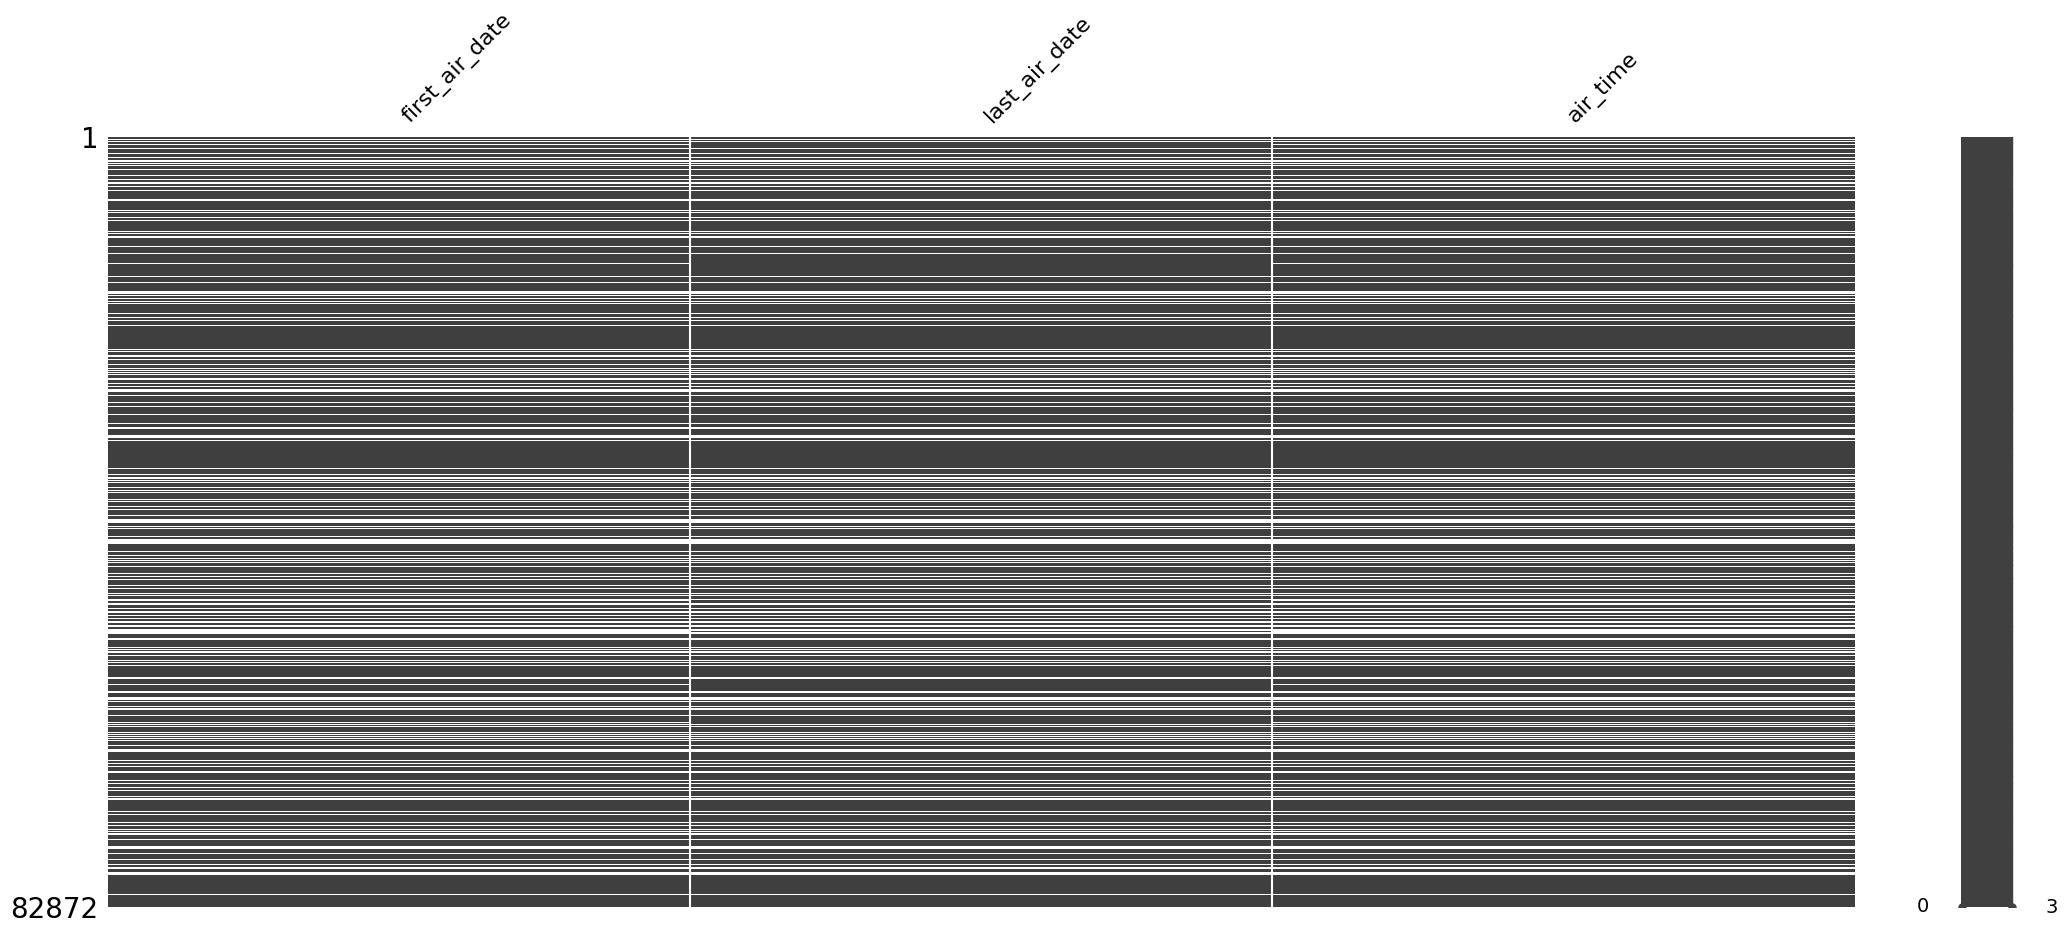

In [20]:
!pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = tmdb_eda.columns[tmdb_eda.isnull().any()].tolist()
msno.matrix(tmdb_eda[missingdata_df])

# Missingness Correlation HeatMap

A missingness correlation heatmap is a visualization that helps you understand the relationships between missing values in different columns of your dataset. It shows the correlation between the presence or absence of data in one column and the presence or absence of data in another column.

<Axes: >

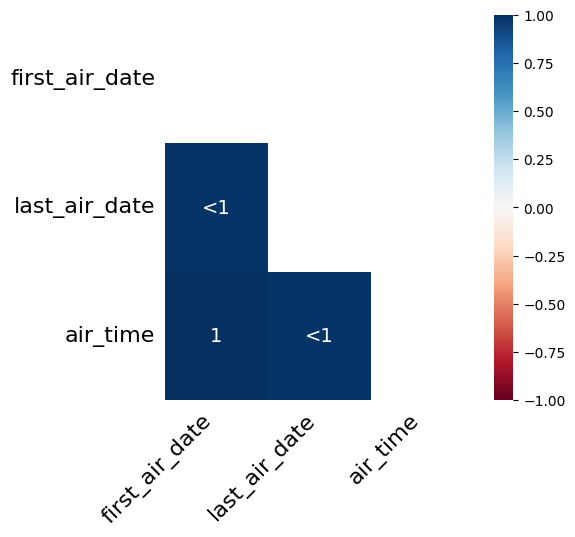

In [21]:
##Creating the  missingness correlation heatmap
msno.heatmap(tmdb_eda[missingdata_df], figsize=(5,5))

# Missing Values & Imputation Methods using MICE and KNN

Missing values imputation is crucial for data analysis and machine learning. Two effective methods are Multiple Imputation by Chained Equations (MICE) and K-Nearest Neighbors (KNN).

**MICE Imputation**

MICE is a statistical method that fills in missing data by iteratively predicting missing values based on other variables in the dataset. It's particularly useful for handling missing values in complex datasets with multiple variables and complex relationships.

**Reasoning:**

Handles various data types: MICE can impute missing values for both numerical and categorical variables.
Preserves data distribution: By iteratively predicting missing values, MICE aims to maintain the original data distribution.
Flexible and robust: It can handle different missing data patterns and complex relationships between variables.

# MICE Imputation

MICE is a statistical method that fills in missing data by iteratively predicting missing values based on other variables in the dataset. It's particularly useful for handling missing values in complex datasets with multiple variables and complex relationships.

**Reasoning:**

Handles various data types: MICE can impute missing values for both numerical and categorical variables.
Preserves data distribution: By iteratively predicting missing values, MICE aims to maintain the original data distribution.
Flexible and robust: It can handle different missing data patterns and complex relationships between variables.

In [22]:
!pip install fancyimpute
import pandas as pd
from fancyimpute import IterativeImputer

# Using DataFrame is called 'tmdb_eda'

# Selecting the columns with missing values to impute, excluding datetime columns and object columns

columns_to_impute = [col for col in tmdb_eda.columns
                     if tmdb_eda[col].isnull().any() and
                     tmdb_eda[col].dtype != 'datetime64[ns]' and
                     tmdb_eda[col].dtype != 'object']  # Exclude datetime and object columns

# Create an IterativeImputer object
imputer = IterativeImputer()

# Impute missing values only in the selected columns
if columns_to_impute: # Check if columns_to_impute is not empty
    tmdb_eda[columns_to_impute] = imputer.fit_transform(tmdb_eda[columns_to_impute])
else:
    print("No suitable columns found for imputation.")

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=79cd8949f204ca7f80f05d4ba169cef6ad9d65e67c39f6e979f080caa361451a
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=fd0de5923ef81e911bf1fc5e66582f03f18957cc44640ba8c608d5b9e4146980
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


# Alternative Approach (KNN Imputation):

While MICE is the preferred approach, you could consider KNN imputation as an alternative, especially for numerical features with relatively few missing values. However, remember to scale your numerical features before applying KNN imputation

In [23]:
!pip install sklearn
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is called 'tmdb_eda'
# Select numerical columns with missing values
numerical_cols = tmdb_eda.select_dtypes(include=['number']).columns[tmdb_eda.select_dtypes(include=['number']).isnull().any()]

# Check if numerical_cols is empty or contains all-NaN columns
if numerical_cols.empty:
    print("No numerical columns with missing values found.")
else:
    # Remove columns with all NaN values
    numerical_cols = [col for col in numerical_cols if not tmdb_eda[col].isnull().all()]

    # Check if numerical_cols is empty after removing all-NaN columns
    if numerical_cols.empty:
        print("No numerical columns with missing values found (after removing all-NaN columns).")
    else:
        # Scale numerical features
        scaler = StandardScaler()
        tmdb_eda[numerical_cols] = scaler.fit_transform(tmdb_eda[numerical_cols])

        # Create a KNNImputer object
        imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed

        # Impute missing values for numerical features
        tmdb_eda[numerical_cols] = imputer.fit_transform(tmdb_eda[numerical_cols])

        # Inverse transform to original scale (if necessary)
        tmdb_eda[numerical_cols] = scaler.inverse_transform(tmdb_eda[numerical_cols])

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
No numerical columns with missing values found.


In [24]:
import pandas as pd

# Using tmdb_eda as DataFrame

# 1. Check for Missing Values:
print(tmdb_eda.isnull().sum())

# 2. Imputation Methods:

# a. Mean/Median Imputation (for numerical features):

for column in tmdb_eda.select_dtypes(include=['number']).columns:
    if tmdb_eda[column].isnull().any():
        # Use mean if the data is normally distributed, otherwise use median
        if tmdb_eda[column].skew() < 1:  # Check for skewness
            tmdb_eda[column].fillna(tmdb_eda[column].mean(), inplace=True)
        else:
            tmdb_eda[column].fillna(tmdb_eda[column].median(), inplace=True)

# b. Mode Imputation (for categorical features):

for column in tmdb_eda.select_dtypes(include=['object']).columns:
    if tmdb_eda[column].isnull().any():
        tmdb_eda[column].fillna(tmdb_eda[column].mode()[0], inplace=True)

# 3. Removing Incomplete Records (optional):

# If a significant portion of data is missing for certain rows,
# consider removing those rows:
# tmdb_eda.dropna(inplace=True)

# 4. Verify Changes:
print(tmdb_eda.isnull().sum())

name                        0
id                          0
number_of_seasons           0
number_of_episodes          0
vote_count                  0
vote_average                0
first_air_date          19989
last_air_date           19428
popularity                  0
type                        0
genres                      0
created_by                  0
languages                   0
networks                    0
origin_country              0
production_companies        0
episode_run_time            0
popularity_log              0
adult_True                  0
air_time                    0
dtype: int64
name                        0
id                          0
number_of_seasons           0
number_of_episodes          0
vote_count                  0
vote_average                0
first_air_date          19989
last_air_date           19428
popularity                  0
type                        0
genres                      0
created_by                  0
languages                  

# Missing Values Imputation

Missing values imputation is the process of filling in missing data points in your dataset with estimated values. It's an important step in data preprocessing because many machine learning algorithms cannot handle missing values directly.


Using two main imputation methods:

**1.Mean/Median Imputation:**

For numerical features:

If the data is normally distributed (low skewness), missing values are filled with the mean of the column.
If the data is skewed, missing values are filled with the median of the column.

Reasoning:

Mean imputation is appropriate for normally distributed data as it preserves the overall distribution.

Median imputation is more robust to outliers and is preferred for skewed data.

**2. Mode Imputation: **

For categorical features:

Missing values are filled with the mode (most frequent value) of the column.
Reasoning:

Mode imputation is the most common approach for categorical data as it replaces missing values with the most likely category.

In [25]:
tmdb_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  object        
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  float64       
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  int64         
 10  genres                82872 non-null  int64         
 11  created_by            82872 non-null  int64         
 12  languages             82872 non-null  int64         
 13  networks        

# Investigating the option for Imputing enpty rows (5%) from the tmdb_eda Data Set

In [26]:
#tmdb_eda2 = tmdb_eda[['first_air_date','last_air_date ']].replace(0, np.NaN)
tmdb_eda.info()
tmdb_eda2 = tmdb_eda.copy()

# drop rows with missing values

tmdb_eda2.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
tmdb_eda2.info()

print(tmdb_eda2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  object        
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  float64       
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  int64         
 10  genres                82872 non-null  int64         
 11  created_by            82872 non-null  int64         
 12  languages             82872 non-null  int64         
 13  networks        

#Conclution: The dropout reduce the DataSet  shape   from ( 82872) into (58,587)  

# Therefore I do not procced with tne New Dataset  and use the Old Dataset.

In [27]:
tmdb_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  object        
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  float64       
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  int64         
 10  genres                82872 non-null  int64         
 11  created_by            82872 non-null  int64         
 12  languages             82872 non-null  int64         
 13  networks        

In [28]:
tmdb_clean=tmdb_eda.copy()

# Download tmdb_clean as pickel file to my Google Drive

In [29]:
# Import necessary libraries
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_NP DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_clean, file)
  print(f"tmdb_clean saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_eda is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_clean saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl


# Import tmdb_clean as pickel file from my Google Drive

In [30]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_clean = pickle.load(file)
    print(f"tmdb_clean loaded from {file_path} successfully.")

    #  use the loaded DataFrame (tmdb_eda)
    #  display the first few rows:
    print(tmdb_clean.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_clean loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl successfully.
              name        id  number_of_seasons  number_of_episodes  \
0          minutes   39280.0                  1                 0.0   
1              man  222838.6                  1                 5.0   
2   erne tur retur  222838.6                  1                10.0   
3                    34835.0                  1                12.0   
4             bama   42598.0                  1                 0.0   

   vote_count  vote_average first_air_date last_air_date  popularity  type  \
0           0           0.0            NaT           NaT    0.470004     4   
1           3           7.7     2023-05-28    2023-06-25    1.723837     4   
2           0           0.0     2014-05-15    2014-07-17    0.470004     4   
3           5         